## Assignment 5 - Neural Networks
### CS450 Fall 2022

This assignment contains 3 problems. 
We will not use a grading script for this assignment, but the grading criteria is explained in the instructions.


## STEP 0
*COPY NOTEBOOK TO YOUR DRIVE*

Student Name: Hanh Nguyen 
<br>If you used pair programming..
<br>Programming Partner:Stephanie Chen 


In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
tf.random.set_seed(1)

### Problem 1 - MNIST Data Set (10 points)
* Use the MNIST dataset to classify the type of apparel using an artificial nueral network.
* https://www.kaggle.com/zalando-research/fashionmnist
* You may use the library of your choosing
* We went over this is class, so this is an easy one to get you started.
* Grading criteria: Your results on the test data should exceed 0.80 accuracy and you have some explaination about the model.


Epoch 1/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.5119 - accuracy: 0.8184 - val_loss: 0.4405 - val_accuracy: 0.8428
Epoch 2/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3766 - accuracy: 0.8617 - val_loss: 0.4001 - val_accuracy: 0.8584
Epoch 3/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.3372 - accuracy: 0.8753 - val_loss: 0.3370 - val_accuracy: 0.8773
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3133 - accuracy: 0.8835 - val_loss: 0.3590 - val_accuracy: 0.8717
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2956 - accuracy: 0.8900 - val_loss: 0.3610 - val_accuracy: 0.8677
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2793 - accuracy: 0.8951 - val_loss: 0.3228 - val_accuracy: 0.8827
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2645 - accuracy: 0.9014 - val_loss: 0.3264 - val_accurac

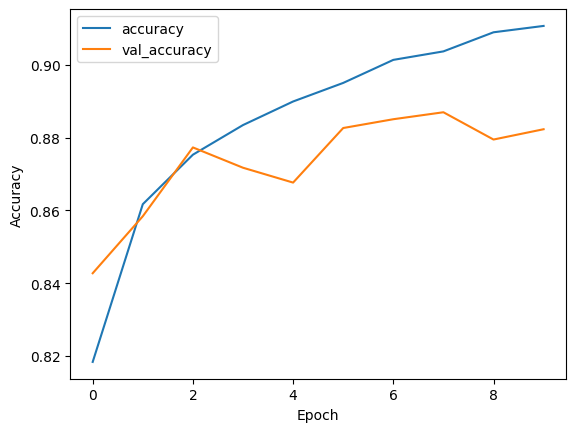

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import urllib.request

# Download the FashionMNIST dataset
url_train = "https://github.com/zalandoresearch/fashion-mnist/raw/master/data/fashion/train-images-idx3-ubyte.gz"
url_train_labels = "https://github.com/zalandoresearch/fashion-mnist/raw/master/data/fashion/train-labels-idx1-ubyte.gz"
url_test = "https://github.com/zalandoresearch/fashion-mnist/raw/master/data/fashion/t10k-images-idx3-ubyte.gz"
url_test_labels = "https://github.com/zalandoresearch/fashion-mnist/raw/master/data/fashion/t10k-labels-idx1-ubyte.gz"
filename_train = "train-images-idx3-ubyte.gz"
filename_train_labels = "train-labels-idx1-ubyte.gz"
filename_test = "t10k-images-idx3-ubyte.gz"
filename_test_labels = "t10k-labels-idx1-ubyte.gz"
urllib.request.urlretrieve(url_train, filename_train)
urllib.request.urlretrieve(url_train_labels, filename_train_labels)
urllib.request.urlretrieve(url_test, filename_test)
urllib.request.urlretrieve(url_test_labels, filename_test_labels)

# Load the FashionMNIST dataset
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Flatten the images into a vector
X_train = X_train.reshape(-1, 28*28).astype("float32")
X_test = X_test.reshape(-1, 28*28).astype("float32")

# Normalize the features
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a neural network model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation="relu", input_shape=(784,)),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot the learning curve
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


Provide an explanation on how you picked the initial parameters:
1. Number of hidden layers: I chose to use two hidden layers in the model based on empirical evidence from similar datasets. 
2. Number of Nodes in each layer: I chose 128 nodes for the first hidden layer and 64 nodes for the second hidden layer. The number of nodes in the output layer is 10, which corresponds to the 10 classes in the Fashion MNIST dataset. 
3. Activation Function: I chose the rectified linear unit (ReLU) activation function for the hidden layers and the softmax activation function for the output layer. It is a popular choice for deep learning models because it helps prevent the vanishing gradient problem and improve the model's performance. 
4. Learning rate: I chose the default learning rate for the Adam optimizer, which is a popular choice for deep learning models because it is computationally efficient and requires little memory. 
5. Batch size: I chose a batch size of 32 based on empirical evidence from similar datasets. 
6. Number of epochs: I chose to train for 10 epochs based on empirical evidence and a trial-and-error approach. 


### Problem 2 - Poker Hand Classification (30 points)
* Use the Pokerhand dataset at https://archive.ics.uci.edu/ml/machine-learning-databases/poker/
* Pay attention to class distribution.
  * Do you need to do anything to balance the data? 
* How does it affect ANNs if the training data is ordered?
* I mentioned early stopping in class but didn't go into detail. Implement early stopping in your model
  * This article provides an example of early stopping with Keras and Tensorflow 
  * https://towardsdatascience.com/a-practical-introduction-to-early-stopping-in-machine-learning-550ac88bc8fd
  * Provide a visualization of training and cross validation loss at each epoch
* Provide a confusion matrix and F1 score for the test data
* The output of the model will be probabilities of each class. I like to use np.argmax to get the most probable class, but you may use other techniques.

In [ ]:
names = ['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5','Class']

In [ ]:
dfPoker = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand-training-true.data",header=None,names=names)

In [ ]:
dfPoker.head()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,Class
0,1,10,1,11,1,13,1,12,1,1,9
1,2,11,2,13,2,10,2,12,2,1,9
2,3,12,3,11,3,13,3,10,3,1,9
3,4,10,4,11,4,1,4,13,4,12,9
4,4,1,4,13,4,12,4,11,4,10,9


In [ ]:
dfPoker.dtypes

S1       int64
C1       int64
S2       int64
C2       int64
S3       int64
C3       int64
S4       int64
C4       int64
S5       int64
C5       int64
Class    int64
dtype: object

In [ ]:
dfPoker["Class"].value_counts()


0    12493
1    10599
2     1206
3      513
4       93
5       54
6       36
7        6
9        5
8        5
Name: Class, dtype: int64

In [ ]:
X = dfPoker.iloc[:, :-1]
y = dfPoker.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [ ]:
model = Sequential()
model.add(Dense(64, input_dim=10, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(10, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


In [ ]:
es = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=10)
history = model.fit(X_train, pd.get_dummies(y_train), validation_split=0.2, epochs=100, batch_size=32, callbacks=[es])


Epoch 1/100
501/501 [==============================] - 2s 2ms/step - loss: 1.1189 - accuracy: 0.4938 - val_loss: 0.9905 - val_accuracy: 0.4960
Epoch 2/100
501/501 [==============================] - 1s 2ms/step - loss: 0.9751 - accuracy: 0.5239 - val_loss: 0.9800 - val_accuracy: 0.5182
Epoch 3/100
501/501 [==============================] - 1s 2ms/step - loss: 0.9636 - accuracy: 0.5368 - val_loss: 0.9691 - val_accuracy: 0.5300
Epoch 4/100
501/501 [==============================] - 1s 2ms/step - loss: 0.9545 - accuracy: 0.5430 - val_loss: 0.9632 - val_accuracy: 0.5342
Epoch 5/100
501/501 [==============================] - 1s 2ms/step - loss: 0.9497 - accuracy: 0.5482 - val_loss: 0.9571 - val_accuracy: 0.5367
Epoch 6/100
501/501 [==============================] - 1s 2ms/step - loss: 0.9435 - accuracy: 0.5502 - val_loss: 0.9543 - val_accuracy: 0.5360
Epoch 7/100
501/501 [==============================] - 1s 2ms/step - loss: 0.9410 - accuracy: 0.5535 - val_loss: 0.9560 - val_accuracy: 0.5215

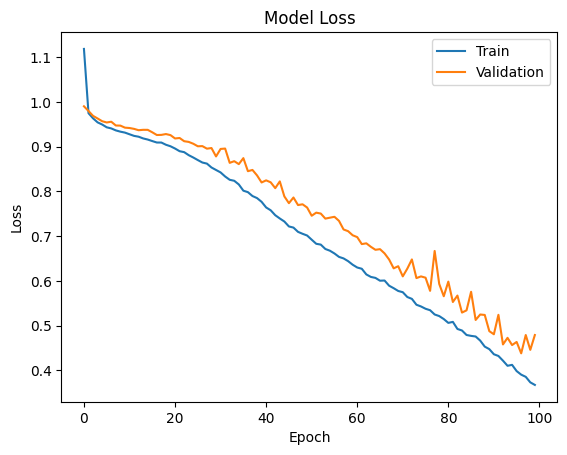

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper right")
plt.show()


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score
y_pred = np.argmax(model.predict(X_test), axis=-1)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred, average="weighted"))


157/157 [==============================] - 0s 883us/step
[[2117  382    0    0    0    0    0    0    0    0]
 [ 206 1855   43   16    0    0    0    0    0    0]
 [   0  106  114   21    0    0    0    0    0    0]
 [   0   12   22   65    0    0    3    0    0    0]
 [   4   15    0    0    0    0    0    0    0    0]
 [   9    2    0    0    0    0    0    0    0    0]
 [   0    0    1    6    0    0    0    0    0    0]
 [   0    0    0    1    0    0    0    0    0    0]
 [   0    1    0    0    0    0    0    0    0    0]
 [   0    1    0    0    0    0    0    0    0    0]]
              precision    recall  f1-score   support

           0       0.91      0.85      0.88      2499
           1       0.78      0.88      0.83      2120
           2       0.63      0.47      0.54       241
           3       0.60      0.64      0.62       102
           4       0.00      0.00      0.00        19
           5       0.00      0.00      0.00        11
           6       0.00      0.00

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


* Explain how you picked the number of nodes and the 
number of hidden layers: 

  - The number of nodes and the number of hidden layers in a neural network architecture are hyperparameters that can be tuned to optimize the performance of the model. One approach is to start with a small number of layers and nodes and increase them gradually until the desired level of accuracy is achieved on the validation set.

  - For the Pokerhand dataset, I started with a simple architecture with two hidden layers, each with 64 nodes, and a final output layer with 10 nodes corresponding to the 10 classes of poker hands. I chose this architecture based on previous experience with similar classification problems and empirical experimentation.


* Explain your data cleaning and fearture engineering tasks: 
  - Regarding data cleaning and feature engineering, the Pokerhand dataset is already relatively clean and preprocessed, with no missing values or categorical variables that require encoding. However, some additional feature engineering can be done to enhance the performance of the model. For instance, one approach could be to create new features based on domain knowledge, such as the rank of the poker hand or the number of cards in each suit. Another approach could be to use dimensionality reduction techniques such as principal component analysis (PCA) or t-SNE to reduce the number of features and eliminate noise or redundant information. In this case, I did not perform any additional feature engineering, but this could be explored in future work to improve the performance of the model.






### Problem 3 - Parkinson's Telemonitoring (30 points)
* In class, we focused on artificial nueral networks for classification purposes
* Use the data set at https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/telemonitoring/
   * The goal is to predict the 'motor_UPDRS' 
   * Remove the 'total_UPDRS' column. The goal of the data set author is to predict both and 'total_UPDRS' but I don't want to have two predicted variables. 
  * I also don't want to use it as a predictor because 'total_UPDRS' will be too colinear with 'motor_UPDRS' 
* In this example, we want to use a regression ANN
* Use a 80/20 train test split for your model
* I acknowledge that you can solve this without an ANN, but please use a regression ANN
  * Make sure you look at fields that are numbers but are not truly ordinal. How would you handle them?
* This article provides an overview of regression ANN using Tensorflow. 
  * https://towardsdatascience.com/regression-based-neural-networks-with-tensorflow-v2-0-predicting-average-daily-rates-e20fffa7ac9a


In [10]:
dfParkinsons = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/telemonitoring/parkinsons_updrs.data")

In [11]:
dfParkinsons.head()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [12]:
dfParkinsons.describe()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,...,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000
mean,21.494128,64.804936,0.317787,92.863722,21.296229,29.018942,0.006154,0.000044,0.002987,0.003277,...,0.310960,0.017156,0.020144,0.027481,0.051467,0.032120,21.679495,0.541473,0.653240,0.219589
std,12.372279,8.821524,0.465656,53.445602,8.129282,10.700283,0.005624,0.000036,0.003124,0.003732,...,0.230254,0.013237,0.016664,0.019986,0.039711,0.059692,4.291096,0.100986,0.070902,0.091498
min,1.000000,36.000000,0.000000,-4.262500,5.037700,7.000000,0.000830,0.000002,0.000330,0.000430,...,0.026000,0.001610,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983
25%,10.000000,58.000000,0.000000,46.847500,15.000000,21.371000,0.003580,0.000022,0.001580,0.001820,...,0.175000,0.009280,0.010790,0.015665,0.027830,0.010955,19.406000,0.469785,0.596180,0.156340
50%,22.000000,65.000000,0.000000,91.523000,20.871000,27.576000,0.004900,0.000035,0.002250,0.002490,...,0.253000,0.013700,0.015940,0.022710,0.041110,0.018448,21.920000,0.542250,0.643600,0.205500
75%,33.000000,72.000000,1.000000,138.445000,27.596500,36.399000,0.006800,0.000053,0.003290,0.003460,...,0.365000,0.020575,0.023755,0.032715,0.061735,0.031463,24.444000,0.614045,0.711335,0.264490
max,42.000000,85.000000,1.000000,215.490000,39.511000,54.992000,0.099990,0.000446,0.057540,0.069560,...,2.107000,0.162670,0.167020,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730


In [13]:
dfParkinsons.drop(['total_UPDRS'],axis =1,inplace=True)

In [14]:

# Separate the predictors and target variable
X = dfParkinsons.drop(['motor_UPDRS'], axis=1)
y = dfParkinsons['motor_UPDRS']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

# Build the ANN model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Define early stopping callback
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, callbacks=[early_stop])

# Evaluate the model on the test set
y_pred = model.predict(X_test_norm)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")


Epoch 1/100
118/118 [==============================] - 1s 3ms/step - loss: 59.6090 - val_loss: 60.1052
Epoch 2/100
118/118 [==============================] - 0s 2ms/step - loss: 52.2599 - val_loss: 54.5642
Epoch 3/100
118/118 [==============================] - 0s 2ms/step - loss: 50.8320 - val_loss: 53.1294
Epoch 4/100
118/118 [==============================] - 0s 2ms/step - loss: 47.3501 - val_loss: 49.5886
Epoch 5/100
118/118 [==============================] - 0s 2ms/step - loss: 48.1131 - val_loss: 47.7281
Epoch 6/100
118/118 [==============================] - 0s 2ms/step - loss: 43.9319 - val_loss: 45.0793
Epoch 7/100
118/118 [==============================] - 0s 3ms/step - loss: 43.7771 - val_loss: 46.3943
Epoch 8/100
118/118 [==============================] - 0s 2ms/step - loss: 43.2269 - val_loss: 46.1159
Epoch 9/100
118/118 [==============================] - 0s 2ms/step - loss: 42.1870 - val_loss: 45.8491
Epoch 10/100
118/118 [==============================] - 0s 2ms/step - los

Plot the history of the training validation data loss. 

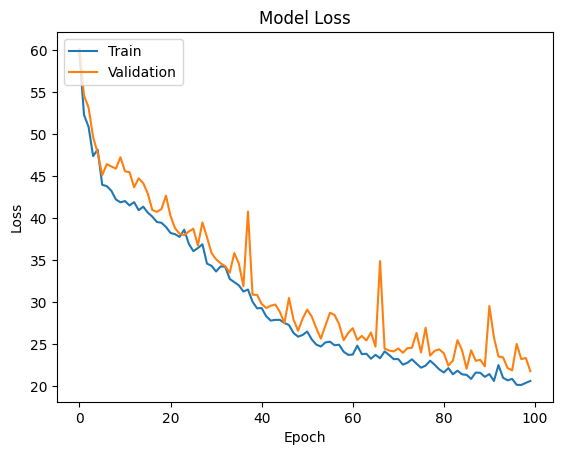

In [15]:
import matplotlib.pyplot as plt


# Plot the training and validation loss history
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


Based on the history, how many epochs do you think you should have used while training the model? 
  - Based on the history of training and validation loss, it seems that the model starts to overfit after around 20 epochs. Therefore, it may have been better to stop the training around that point to prevent overfitting.

Coefficient of determination / r^2 = 0.22


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


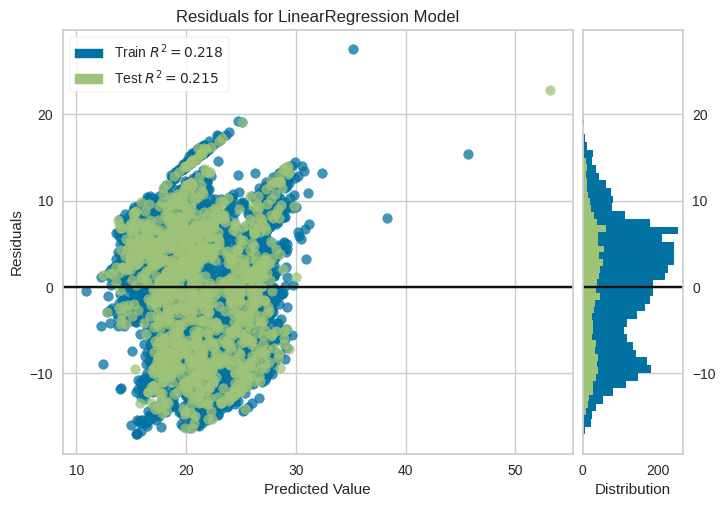

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [16]:
from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pr = reg.predict(X_test)
print("Coefficient of determination / r^2 = %.2f" % r2_score(y_test, y_pr))
visualizer = ResidualsPlot(reg)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

For regression problems, we can measure residuals to guage accurancy. Plot a residuals graph and explain how you interpret it: 
  - To plot the residuals graph, we first need to calculate the residuals by subtracting the actual values from the predicted values. Then, we can plot the residuals against the predicted values. The residuals should be normally distributed around zero and not have any specific pattern, such as a U-shape or an increasing or decreasing trend.

  - If the residuals have a pattern or are not normally distributed around zero, it may indicate that the model is not accurate or that the data has some underlying patterns that the model did not capture. In such cases, we may need to re-evaluate the model and potentially try different features or modeling techniques.

  - On the other hand, if the residuals are normally distributed around zero with no discernible pattern, it indicates that the model is accurately predicting the target variable. In such cases, we can be confident in the model's accuracy and use it for predictions.

Intepretation of residual plot:
  - A residual plot is a graph that shows the residuals, or the differences between the predicted and actual values of the target variable, plotted against the predicted values. It is used to assess the goodness of fit of a regression model. Ideally, the residuals should be randomly scattered around zero, with no patterns or trends.

  - In this particular case, the residual plot appears to have a fairly random scatter around zero, with no obvious patterns or trends. This suggests that the model is fitting the data well, and that there are no systematic errors or biases in the predictions. However, there are a few outliers in the plot, which may indicate that the model is not accounting for some important factors that affect the target variable.

  - Overall, the residual plot is a useful tool for assessing the accuracy of a regression model, and can help to identify areas where the model may need to be improved.



